## Outliers

In [ ]:
Data points which are far away from oberservations

a = [1,2,3,5,8,9,100,2,5]

a = [1,2,3,5,8,9,2,5]



.## 1. How outliers are introduced in the data

In [ ]:
1. Data Entry error
2. Measurement Error
3. Intentional Error  >> dummy Datasets
4. Sampling Error     >> Mixing of data from wrong resources
5. Natural Error 

## 2. Impact of Outliers

In [ ]:
1. High impact on Mean and std
2. Impact on basic assumptions of algorithm (Normality, Homoscedasticity)
3. Algorithm do not perform well in presence of outliers (Accuracy,MSE,Precision,Recall)
4. Reduce the power of statstical analysis

In [1]:
import numpy as np
a = np.array([1,2,3,5,8,9,2,5])
b = np.array([1,2,3,5,8,9,100,2,5])
print("Without Outliers",np.mean(a))
print("With Outliers",np.mean(b))

Without Outliers 4.375
With Outliers 15.0


In [2]:
a = np.array([1,2,3,5,8,9,2,5])
b = np.array([1,2,3,5,8,9,100,2,5])
print("Without Outliers",np.std(a))
print("With Outliers",np.std(b))

Without Outliers 2.7357585785299112
With Outliers 30.16252273563632


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

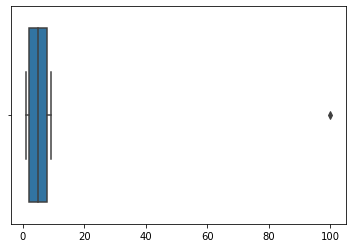

In [4]:
import seaborn as sns
sns.boxplot(b)

## 3 Impact of Outliers on ML Algorithm

## 3.1 Sensitive to Outliers

In [ ]:
1. Linear regression
2. Logistic regression
3. K-Nearest Neighbour
4. Support Vector Machine
5. K-Means Clustering

## 3.2 Non Sensitive to Outliers

In [ ]:
1. Decision Tree
2. Random Forest
3. AdaBoost
4. XGBoost
5. Gradient Boosting
6. Naive Bayes 


## 4. Detection of Outliers

In [ ]:
1. Boxplot >>  Visualization
2. Scatterplot  >>  Visualization
3. Z-Score
4. IQR Method

## 5. How to handle Outliers

In [ ]:
1. Delete Obeservation
2. Imputation Techinque(Capping) : Used to remove Outliers
    e.g mean, mode , median, zero, min,max,static value
3. Transformation :  Used to reduce the impact of outliers
    1. Normalization ( 0 to 1)
    2. Standardization    (fixed > -3 to  +3)
    3. Cuberoot 
    4. Squareroot
    5. Reciprocal
    6. Log Transformation

In [6]:
a = np.array([1,2,3,5,8,9,2,5,100])
np.log(a)  # reduce effect of outliers

array([0.        , 0.69314718, 1.09861229, 1.60943791, 2.07944154,
       2.19722458, 0.69314718, 1.60943791, 4.60517019])

## 7. How to detect

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
array1 = np.random.randint(20,40,size=20)
array1

array([21, 24, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
       28, 36, 39])

<AxesSubplot:ylabel='Density'>

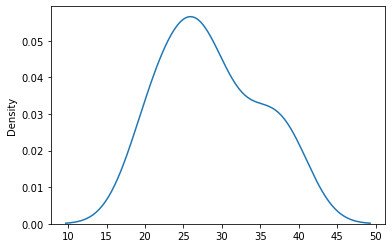

In [10]:
sns.kdeplot(array1)

In [11]:
from scipy.stats import shapiro
_,p_val = shapiro(array1)
if p_val >=0.05:
    print("Data is normally distributed")
else:
      print("Data is not normally distributed")

Data is normally distributed


<AxesSubplot:ylabel='Density'>

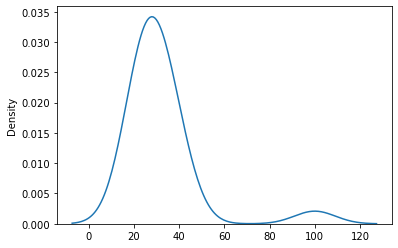

In [12]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
sns.kdeplot(array2)

In [13]:
from scipy.stats import shapiro
_,p_val = shapiro(array2)
if p_val >=0.05:
    print("Data is normally distributed")
else:
      print("Data is not normally distributed")

Data is not normally distributed


<AxesSubplot:ylabel='Density'>

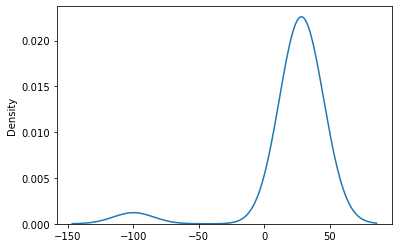

In [14]:
array2 = np.array([21, 24,-100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
sns.kdeplot(array2)

In [17]:
from scipy.stats import shapiro
_,p_val = shapiro(array2)
print(p_val)
if p_val >=0.05:
    print("Data is normally distributed")
else:
      print("Data is not normally distributed")

4.136922981956559e-08
Data is not normally distributed


## 1. z_score

In [ ]:

std >> How far away is our datapoint from mean
z_score  =  (X - Xmean) /std
     It tells how many std deviation data points away from its mean
    
    where 
    X >> Actual data points
    Xmean >> Mean Value
    std > Standard deviation
    
Outliers Treatement:
    1. Trimming (Drop)
    2. Imputation (Capping)

In [19]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
array2

array([ 21,  24, 100,  27,  22,  27,  24,  39,  38,  20,  29,  28,  33,
        26,  31,  25,  20,  35,  28,  36,  39])

In [20]:
X_mean = np.mean(array2)
print("Mean",X_mean)
std = np.std(array2)
print("Std",std)

Mean 32.0
Std 16.327015298927986


In [22]:
# calculate z_score for 21
z_Score = (21 - X_mean)/std
print(z_Score)

-0.673729998937543


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

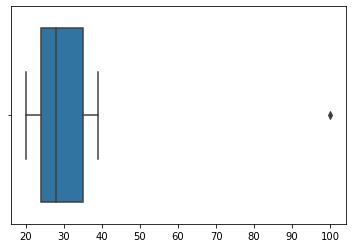

In [24]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
sns.boxplot(array2)

In [23]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
X_mean = np.mean(array2)
print("Mean",X_mean)
std = np.std(array2)
print("Std",std)

outliers_list = []
for x_val in array2:
    z_score = (x_val - X_mean)/std
    print("z_score",z_score)
    

Mean 32.0
Std 16.327015298927986
z_score -0.673729998937543
z_score -0.48998545377275854
z_score 4.164876357068447
z_score -0.3062409086079741
z_score -0.6124818172159482
z_score -0.3062409086079741
z_score -0.48998545377275854
z_score 0.42873727205116374
z_score 0.3674890903295689
z_score -0.7349781806591378
z_score -0.18374454516478445
z_score -0.24499272688637927
z_score 0.06124818172159482
z_score -0.3674890903295689
z_score -0.06124818172159482
z_score -0.42873727205116374
z_score -0.7349781806591378
z_score 0.18374454516478445
z_score -0.24499272688637927
z_score 0.24499272688637927
z_score 0.42873727205116374


In [25]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38, 20, 29, 28, 33, 26, 31, 25, 20, 35,
                           28, 36, 39])
X_mean = np.mean(array2)
print("Mean",X_mean)
std = np.std(array2)
print("Std",std)

threshold = 3
outliers_list = []
for x_val in array2:
    z_score = (x_val - X_mean)/std
    z_score = np.abs(z_score)
    z_score = np.around(z_score,2)
    if z_score >= threshold:
        outliers_list.append(x_val)
outliers_list

Mean 32.0
Std 16.327015298927986


[100]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

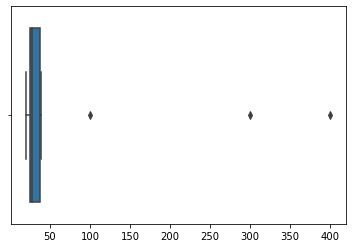

In [28]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])
sns.boxplot(array2)

In [30]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])
X_mean = np.mean(array2)
print("Mean",X_mean)
std = np.std(array2)
print("Std",std)

threshold = 2
outliers_list = []
for x_val in array2:
    z_score = (x_val - X_mean)/std
    z_score = np.abs(z_score)
    z_score = np.around(z_score,2)
    print(z_score)
    if z_score >= threshold:
        outliers_list.append(x_val)
outliers_list

Mean 59.65217391304348
Std 92.13865199212694
0.42
0.39
0.44
0.35
0.41
0.35
0.39
0.22
0.23
2.61
0.43
0.33
0.34
0.29
0.37
0.31
0.38
0.43
3.69
0.27
0.34
0.26
0.22


[300, 400]

In [34]:
from scipy import stats
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])
z_score = np.abs(stats.zscore(array2))
threshold =3
outlier = np.where(z_score >= threshold)
array2[outlier]

array([400])

## 2. IQR

In [ ]:
IQR >> Inter Quartile Range
In IQR ANY DATA POINTS ARE LESS THAN LOWER TAIL OR MORE THAN UPPER TAIL THEN IT TREATES AS OUTLIERS

Q1 >1ST QUARTILE >> 25%
Q2 > 2ND QUARTILE >50%
Q3 > 3RD QUARTILE > 75%
IQR = Q3 - Q1

Uppertail = Q3 + 1.5 *IQR
Lowertail = Q1 - 1.5 *IQR

In [35]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

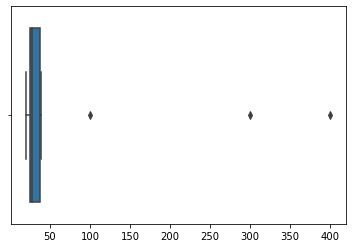

In [40]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])
sns.boxplot(array2)

In [38]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])

q1 = np.quantile(array2,0.25)
q2 = np.quantile(array2,0.50)
q3 = np.quantile(array2,0.75)
IQR = q3 -q1
upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR
array2[np.where(array2 > upper_tail)]

array([100, 300, 400])

### 3. boxplot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

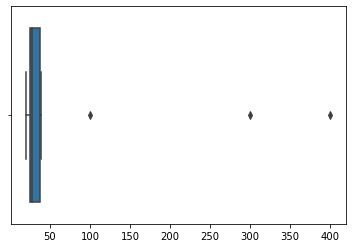

In [41]:
array2 = np.array([21, 24,100, 27, 22, 27, 24, 39, 38,300, 20, 29, 28, 33, 26, 31, 25, 20, 400,35,
                           28, 36, 39])
sns.boxplot(array2)

In [42]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

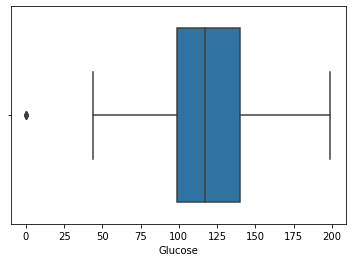

In [45]:
sns.boxplot(df["Glucose"])

In [47]:
q1 = df["Glucose"].quantile(0.25)
q2 = df["Glucose"].quantile(0.50)
q3 = df["Glucose"].quantile(0.75)
IQR = q3 - q1
uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR
print(lowertail)
df.loc[(df["Glucose"] > uppertail) | (df["Glucose"] <lowertail)]  # detection

37.125


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [48]:
df.shape

(768, 9)

In [50]:
df.loc[(df["Glucose"] <= uppertail) & (df["Glucose"] >lowertail)].shape  # drop

(763, 9)

<AxesSubplot:>

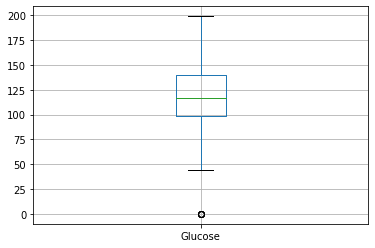

In [51]:
df[["Glucose"]].boxplot()

<AxesSubplot:>

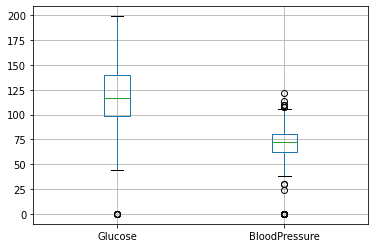

In [52]:
df[["Glucose","BloodPressure"]].boxplot()

## How to Handle Outliers

In [ ]:
1. Delete
2. Imputation( Capping)
3. Transformation